# Maze-Solving-Algorithm-Visualization

This code implements algorithms to solve mazes and visualizes their paths. It generates a maze, plots it, and then applies various maze-solving algorithms, such as Breadth-First Search (BFS), A* (A-Star), and Q-learning. The maze is represented as a 2D array of integers, where 0 denotes free space and 1 represents walls. The algorithms explore the maze to find the optimal path from the starting point to the target point, visualizing the explored cells and the final path.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pandas import *
import numpy

In [9]:
# Sätter bl.a height & width utanför så det är lite mer tydligt vad man faktiskt gör.
# För nöjes skulle skapar vi en ganska stor maze, 20x20 för att utmana algoritmen lite.

w = 8
h = 8

In [10]:
# Skapar ett rum

def make_maze(w , h):
    vis = [[0] * w + [1] for _ in range(h)] + [[1] * (w + 1)]
    ver = [["10"] * w + ['1'] for _ in range(h)] + [[]]
    hor = [["11"] * w + ['1'] for _ in range(h + 1)]
 
    def walk(x, y):
        vis[y][x] = 1
 
        d = [(x - 1, y), (x, y + 1), (x + 1, y), (x, y - 1)]
        shuffle(d)
        for (xx, yy) in d:
            if vis[yy][xx]: continue
            if xx == x: hor[max(y, yy)][x] = "10"
            if yy == y: ver[y][max(x, xx)] = "00"
            walk(xx, yy)
 
    walk(numpy.random.randint(w), numpy.random.randint(h))
 
    s = ""
    for (a, b) in zip(hor, ver):
        s += ''.join(a + ['\n'] + b + ['\n'])
        
    M=[]
    for line in s.split("\n"):
        if line!="":
            R=[]
            for e in line:
                R.append(int(e))
            M.append(R)
    return M
maze=numpy.array(make_maze(8,8))
print(maze)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1]
 [1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1]
 [1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1]
 [1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
 [1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1]
 [1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1]
 [1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1]
 [1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1]
 [1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1]
 [1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1]
 [1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1]
 [1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1]
 [1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


(17, 17)


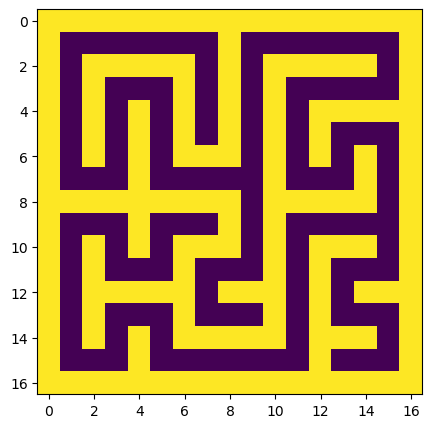

In [15]:
# Vi ser att make_maze fungerar ovanför. Men enbart visa upp den genom 0or och 1or är lite tråkigt
# istället plotar vi ut den vi man kan faktiskt se vilken väg algoritmen kommer att ta.

plt.figure(figsize=(5,5))
maze=numpy.array(make_maze(h,w))
plt.imshow(maze)
print(maze.shape)

In [6]:
# Använder oss utav koden från maze_DFS_BFS
# tom lista för att samla grannarna i
# 2 lists med x och y possible momments.

# ex, ifall x & y är 1,1 skrivs dem följande grannar ut:
# [[1, 2],[2, 1],[1, 0],[0, 1]]

def getNeighbors(x,y):
    nb=list()
    x_axel_momments = [0,1,0,-1]
    y_axel_momments = [1,0,-1,0]
    for i in range(4):
        nb.append([x+x_axel_momments[i],y+y_axel_momments[i]])
    return nb

In [7]:
# Tar in 2 argument.
# Maze en 2D array där som sagt 0 representerar "free space"
# Location, ett par kordinater x & y representerar location av en cell i maze.
# Funktionen returerar en list av "valid" grannar, en granne är valid ifall den är 0.

# Funktionen loopar igenom värderna i x & y-axeln och kollar ifall cellen är en valid = 0

def get_valid_neighbours(maze, location):
    
    nb=list()
    x_axel_momments=[0,1, 0,-1]
    y_axel_momments=[1,0, -1,0]
    
    for o in range(4):
        if maze[location[0]+x_axel_momments[o]][location[1]+y_axel_momments[o]] == 0:
            nb.append([location[0]+x_axel_momments[o],location[1]+y_axel_momments[o]])
    return nb

In [17]:
#starLoc = där vi startar i mazen. x och y kordinat.
#targetLoc = är där vi vill hamna, vårat target.
#distance = 2D array, som används för att lagra distance of each cell from the start loc
#beginning = list som har starten, används för att lagra celler som har "besökts" av BFS algo
#currDist = är en räknare, som håller koll på distansen från startLoc 


startLocation=[1,1]
targetLocation=[15,15]
distances = numpy.zeros(maze.shape) - 1
beginning = [startLocation]
distances[startLocation[0]][startLocation[1]] = 0
currentDistance = 1

Här kör vi Qlearning

In [18]:

# Define the Q-table with size 8x8x4 (8x8 grid, 4 possible actions)
Q = np.zeros((8, 8, 4))

# Define the reward function
def reward(state, action):
    # If the agent has reached the goal, return a large reward
    if state == (15, 15):
        return 100
    # If the agent has taken an invalid action, return a large negative reward
    if action == "invalid":
        return -100
    # Otherwise, return a small negative reward for each step taken
    return -1

# Define the update rule for the Q-table
def update_Q(Q, state, action, next_state, alpha, gamma):
    # Update the Q-value using the Bellman equation
    Q[state[0], state[1], actions.index(action)] = (1 - alpha) * Q[state[0], state[1], actions.index(action)] + alpha * (reward(state, action) + gamma * max(Q[next_state[0], next_state[1]]))


In [9]:
# BFS algo på Maze

# börar med startLoc, utforskar sinna grannar
# uppdaterar distance array för varje cell den besöker
# för att undvika besöka samma cell igen/redan upptäckta celler används currentDistance
# Loopen avslutas då det inte finns fler celler att upptäcka, beginning blir tom.

while len(beginning) > 0:
    newbeginning = []
    for curr in beginning:
        for neighbour in get_valid_neighbours(maze, curr):
            x, y = neighbour
            if maze[x][y] == 0 and distances[x][y] < 0:
                distances[x][y] = currentDistance
                newbeginning.append(neighbour)
    beginning = newbeginning
    currentDistance += 1

In [10]:
from dataclasses import dataclass, field
from typing import Any

@dataclass(order = True)
class PrioritizedItem:
    priority: int
    item: Any=field(compare = False)
    steps: int=field(compare = False)

    def get_item(self):
        return self.item

    def get_walked(self):
        return self.steps

def heuristic(walked, startNode, endNode):
    x1, y1 = startNode
    x2, y2 = endNode
    return walked + (abs(x1 - x2) + abs(y1 - y2))

# Själva A star algo
# A star kombinerar en heuristic funktion, vilket estimerar distansen from en cell to "target" lOC

# PrioritQue, där start är lika med det uppskattade avståndet från start till mål
# heuristi estimerar denna distans
# loopen körs så länge inte Que är tom.
# I varje itteration tas högsta prio bort from que och läggs i cc.
# ifall cellen i cc har redan besökts går algo till nästa itteration.
# Men ifall cc är targetloc, algo retunerar sucess
# annars algo får den valid granne i que med samma prio som distans från startloc till granne + estimerade dist avståndet från granne till taget.

def aStar(maze, startNode, endNode):
    front = PriorityQueue()
    front.put(PrioritizedItem(heuristic(0, startNode, endNode), startNode, 0))
    exploredPath = []
    while front.qsize() > 0:
        cc = front.get()
        if cc.get_item() in exploredPath:
            continue
        if cc.get_item() == endNode:
            return "Successful!", exploredPath + [endNode]
        for nb in get_valid_neighbours(maze, cc.get_item()):
            if maze[nb[0]][nb[1]] == 0:
                front.put(PrioritizedItem(heuristic(cc.get_walked(), nb, endNode), nb, cc.get_walked() + 1))
        exploredPath.append(cc.get_item())

Start  [1, 1]
Goal:  [39, 39]
Answer:  Successful!
Explored:  [[1, 1], [1, 2], [1, 3], [2, 3], [3, 3], [3, 2], [3, 1], [4, 1], [5, 1], [6, 1], [7, 1], [8, 1], [9, 1], [9, 2], [10, 1], [9, 3], [11, 1], [9, 4], [12, 1], [9, 5], [13, 1], [14, 1], [15, 1], [16, 1], [17, 1], [17, 2], [17, 3], [16, 3], [8, 5], [15, 3], [7, 5], [15, 4], [15, 5], [7, 4], [14, 5], [7, 3], [13, 5], [13, 6], [13, 7], [13, 8], [13, 9], [12, 9], [6, 3], [11, 9], [5, 3], [5, 4], [5, 5], [10, 9], [4, 5], [3, 5], [9, 9], [9, 10], [9, 11], [9, 12], [9, 13], [10, 13], [11, 13], [11, 14], [11, 15], [12, 15], [13, 15], [14, 15], [15, 15], [15, 16], [16, 15], [15, 17], [17, 15], [14, 17], [17, 14], [2, 5], [9, 8], [17, 13], [13, 17], [1, 5], [9, 7], [1, 6], [10, 7], [1, 7], [11, 7], [1, 8], [1, 9], [1, 10], [2, 9], [1, 11], [3, 9], [2, 11], [3, 11], [4, 11], [5, 11], [5, 12], [5, 13], [4, 13], [5, 10], [12, 17], [16, 13], [11, 6], [3, 8], [5, 9], [3, 13], [11, 5], [15, 13], [3, 7], [11, 17], [4, 7], [5, 7], [6, 7], [7, 7],

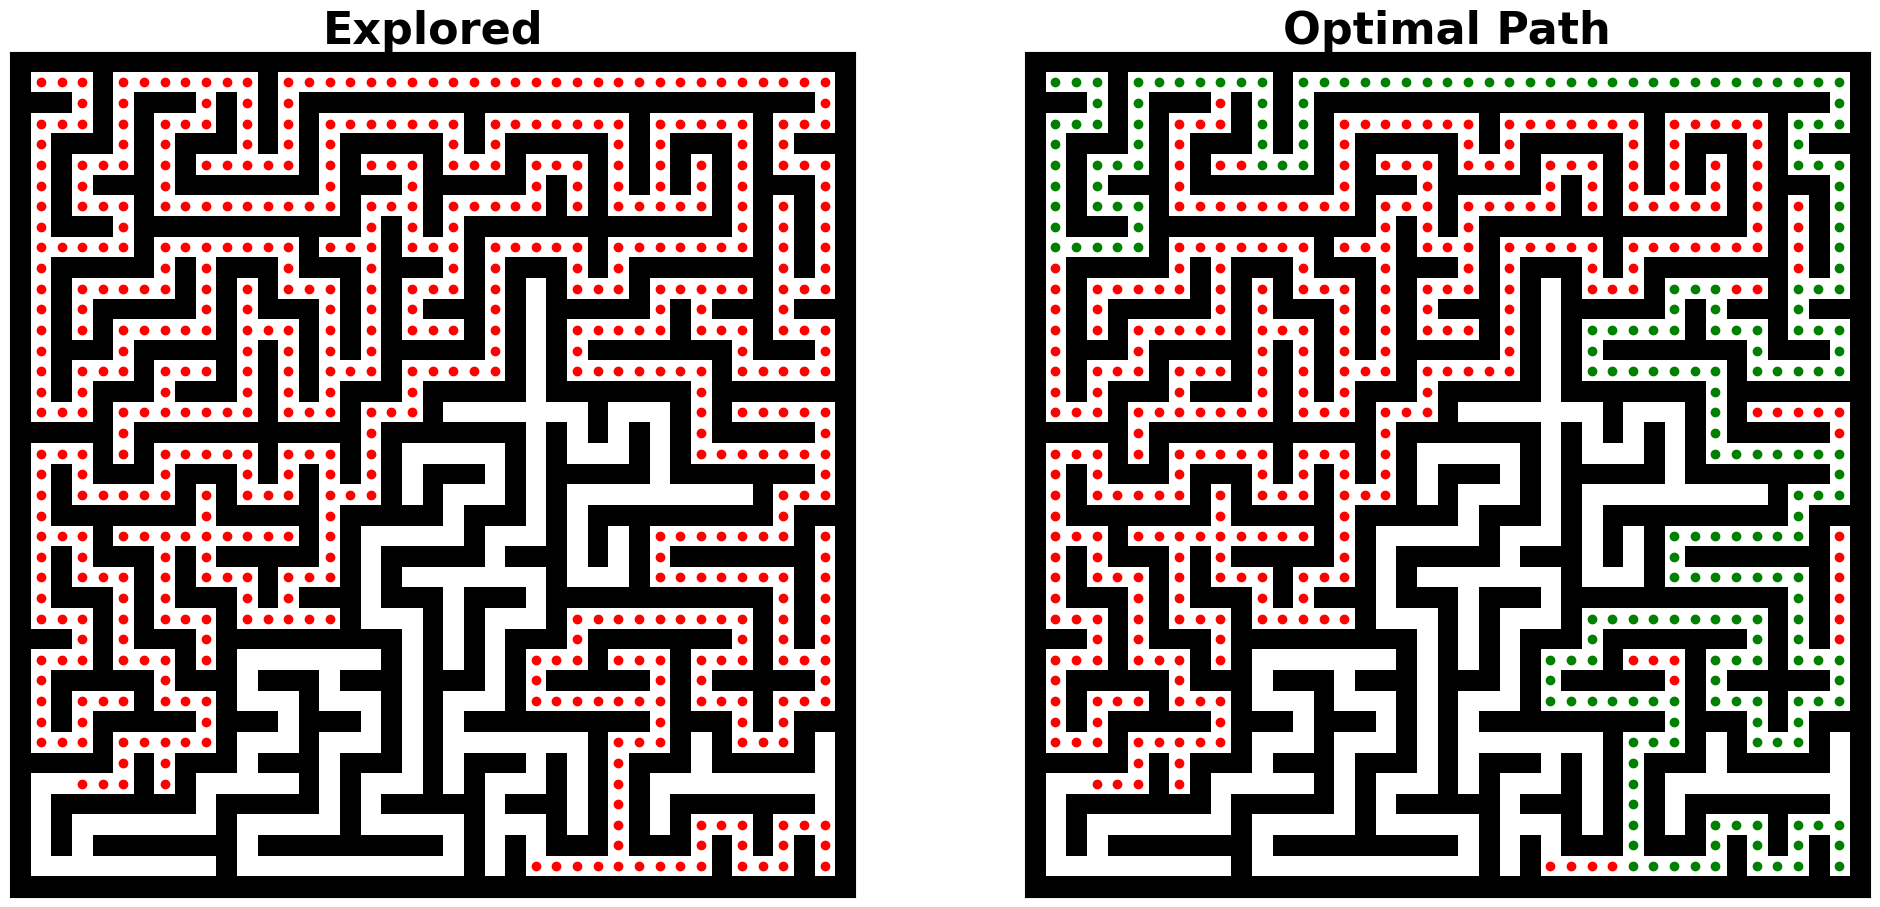

In [11]:
from queue import PriorityQueue

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,12))


ax1.set_title('Explored', fontdict={'fontsize': 32, 'fontweight': 'heavy'})
ax1.tick_params(
    labelbottom=False, bottom=False,
    labelleft=False, left=False,
)

ax2.set_title('Optimal Path', fontdict={'fontsize': 32, 'fontweight': 'heavy'})
ax2.tick_params(
    labelbottom=False, bottom=False,
    labelleft=False, left=False,
)

print('Start ', startLocation)
print('Goal: ', targetLocation)

answer, exploredPath  = aStar(maze, startLocation, targetLocation)

print('Answer: ', answer)
print('Explored: ', exploredPath)

ax1.imshow(maze, cmap='Greys')
ax1.plot(transpose(exploredPath )[1], transpose(exploredPath )[0], 'or')


# loopen försöker hitta den kortaste vägen från start till mål.
# den körs tvärtom, börjar vid mål och slutar vid start.
# samma path som Astar utforskade

# appendar current loc to path
# sedan alla valid grannar från get_valid_neighbours funktionen
# lägger till dem i en lista: neighbours
# initialized empty list: indices och itererar över varje granne in: neighbours
# ifall en granne finns i: exploredPath lägger koden till indexet av den grannen i: exploredPath till: indices

# tillslut när detta är klart, plottas vägen ut i mazen som besöktes men int var del av den optimala vägen.
# bl.a varför det finns 2 plots längst den.

currentLocation = targetLocation
path=[]
while currentLocation != startLocation:
    path.append(currentLocation)
    neighbours = get_valid_neighbours(maze, currentLocation)
    indices = []
    for nb in neighbours:
        if nb in exploredPath :
            indices.append(exploredPath .index(nb))
    currentLocation = exploredPath [min(indices)]
path.append(startLocation)
print('Optimal Path: ', path)
ax2.imshow(maze, cmap='Greys')
deadends = []
for pos in exploredPath :
    if pos not in path:
        deadends.append(pos)
ax2.plot(transpose(deadends)[1], transpose(deadends)[0], 'or')
ax2.plot(transpose(path)[1], transpose(path)[0], 'og')
